# Спринт 7: Машинное обучение

In [2]:
# база
import numpy as np
import pandas as pd

# подготовка данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# модели
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

# метрики
from sklearn.metrics import mean_absolute_error, mean_squared_error

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# гиперпараметры
from sklearn.model_selection import GridSearchCV

# нейронные сети
import tensorflow.keras as keras

# сериализация
import pickle

## Анализ данных

[Характеристика потребности в тепле промышленного процесса](https://data.world/us-doe-gov/4bcb6731-a1d7-4126-9802-aa7165eb8281)

Этот набор данных является дополнением к исследованию технологического тепла на уровне предприятия, проведенному McMillan et al в 2015 году. Используя ту же методологию, годовое потребление энергии при сжигании на установке было рассчитано на основе данных о выбросах, представленных в Программу отчетности Агентства по охране окружающей среды США по парниковым газам за 2010-2015 годы. Итоговые значения энергии в ТДЖ в целом и по видам топлива были дополнительно охарактеризованы по конечному потреблению с использованием данных Обследования энергопотребления на производстве Управления энергетической информации США за 2010 год и по диапазону температур. Набор данных включает рассчитанные выбросы парниковых газов в млн тонн CO2e в разбивке по типу конечного использования топлива и диапазону температур.

### Загрузка данных

In [3]:
df = pd.read_csv('https://query.data.world/s/7tr42dmmvi5qwueiiutiu5vbfltyno', encoding='windows-1252', index_col=0)

In [4]:
df[df.columns]

,CITY,COUNTY,COUNTY_FIPS,Coal,Diesel,END_USE,FACILITY_ID,FINAL_NAICS_CODE,FUEL_TYPE,FUEL_TYPE_BLEND,...,Residual_fuel_oil,STATE,Temp_degC,Total,UNIT_NAME,UNIT_TYPE,for_EU_sum,Temp_Band,Biogenic,MMTCO2E
0,SPARROWS POINT,Baltimore,24005,0.000000,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),0,...,0.0,MD,1100.0,328.280712,Pennwood Boiler #1,"OB (Boiler, other)",True,>400°C,False,0.016527
1,SPARROWS POINT,Baltimore,24005,0.000000,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),0,...,0.0,MD,1100.0,666.678118,Pennwood Boiler #2,"OB (Boiler, other)",True,>400°C,False,0.033563
2,SPARROWS POINT,Baltimore,24005,0.000000,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),0,...,0.0,MD,1100.0,172.814781,Pennwood Boiler #3,"OB (Boiler, other)",True,>400°C,False,0.008700
3,SPARROWS POINT,Baltimore,24005,0.000000,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),0,...,0.0,MD,1100.0,2925.987834,CP-NG Combustion Sources,OCS (Other combustion source),True,>400°C,False,0.147303
4,SPARROWS POINT,Baltimore,24005,0.000000,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),0,...,0.0,MD,1100.0,318.073057,Pennwood Boiler #4,"OB (Boiler, other)",True,>400°C,False,0.016013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94929,VALLIANT,MCCURTAIN,40089,0.000000,0.0,Process Heating,1006776,322130,Coke,0,...,0.0,OK,800.0,0.000000,Lime Kiln (EUG E7),0,True,>400°C,False,0.000000
94930,VALLIANT,MCCURTAIN,40089,0.000000,0.0,Process Heating,1006776,322130,Coke,0,...,0.0,OK,800.0,0.000000,Lime Kiln (EUG E7),0,True,>400°C,False,0.000000
94931,VALLIANT,MCCURTAIN,40089,0.000000,0.0,Process Heating,1006776,322130,Coke,0,...,0.0,OK,800.0,0.000000,Lime Kiln (EUG E7),0,True,>400°C,False,0.000000
94932,ARKANSAS CITY,DESHA,5041,0.000000,0.0,Process Heating,1002708,322130,Coke,0,...,0.0,AR,800.0,0.000000,#1 Lime Kiln,0,True,>400°C,False,0.000000


In [5]:
df.columns

Index(['CITY', 'COUNTY', 'COUNTY_FIPS', 'Coal', 'Diesel', 'END_USE',
       'FACILITY_ID', 'FINAL_NAICS_CODE', 'FUEL_TYPE', 'FUEL_TYPE_BLEND',
       'FUEL_TYPE_OTHER', 'LPG_NGL', 'MECS_NAICS', 'Natural_gas', 'Other',
       'Process_byp', 'Pulp_Paper', 'REPORTING_YEAR', 'Residual_fuel_oil',
       'STATE', 'Temp_degC', 'Total', 'UNIT_NAME', 'UNIT_TYPE', 'for_EU_sum',
       'Temp_Band', 'Biogenic', 'MMTCO2E'],
      dtype='object')

In [6]:
for col in df.columns:
    print(f'{col} :>> {df[col].unique()[:10] if len(df[col].unique()) > 10 else df[col].unique()}')

CITY :>> ['SPARROWS POINT' 'Ashland' 'MIDDLETOWN' 'DEARBORN' 'ROANOKE' 'ECORSE'
 'Braddock' 'GARY' 'CLEVELAND' 'TRINITY']
COUNTY :>> ['Baltimore' 'BOYD' 'Butler' 'WAYNE' 'ROANOKE CITY' 'Allegheny' 'Lake'
 'Cuyahoga' 'MORGAN' 'WARREN COUNTY']
COUNTY_FIPS :>> [24005 21019 39017 26163 51770 42003 18089 39035  1103 42123]
Coal :>> [0.         2.84934459 4.31578253 4.2044075  3.7162136  8.69653383
 2.7871602  8.63991818 1.54811296 6.75118325]
Diesel :>> [ 0.         49.91137101 24.01423067 45.0329232   1.42644673  6.4318483
  1.21818551  3.42489859 35.70538805 36.97920498]
END_USE :>> ['Process Heating' 'CHP and/or Cogeneration Process'
 'Conventional Boiler Use']
FACILITY_ID :>> [1000553 1005615 1000274 1003403 1000714 1001834 1000233 1000418 1007177
 1005976]
FINAL_NAICS_CODE :>> [331111 325110 324110 322130 322121 311221 325199 325311 322110 325181]
FUEL_TYPE :>> ['Natural Gas (Weighted U.S. Average)' 'Blast Furnace Gas' 'Coke Oven Gas'
 'Biogas (Captured methane)' 'Kerosene' 'Motor Gaso

в качестве целевого признака было выбрано кол-во выбросов CO2-эквивалента ('MMTCO2E')

можно сразу отбросить признаки, которые не несут релевантной информации:

- 'CITY'
- 'COUNTY'
- 'COUNTY_FIPS'
- 'FACILITY_ID'
- 'FINAL_NAICS_CODE' 
- 'MECS_NAICS'
- 'REPORTING_YEAR'
- 'STATE'
- 'Temp_Band'
- 'UNIT_NAME'

In [7]:
# df = df[['Coal', 'Diesel', 'END_USE',
#     'FUEL_TYPE', 'FUEL_TYPE_BLEND',
#     'FUEL_TYPE_OTHER', 'LPG_NGL', 'Natural_gas',
#     'Other', 'Process_byp', 'Pulp_Paper', 'Residual_fuel_oil',
#     'Temp_degC', 'Total', 'UNIT_TYPE',
#     'Biogenic', 'MMTCO2E']]
df = df.drop(['CITY', 'COUNTY', 'COUNTY_FIPS', 'FACILITY_ID',
              'FINAL_NAICS_CODE', 'MECS_NAICS', 'REPORTING_YEAR',
              'STATE', 'Temp_Band', 'UNIT_NAME'], axis=1)

In [8]:
# display(new_df.STATE.unique())
numeric_features = ['Coal', 'Diesel', 'LPG_NGL', 'Natural_gas', 'Other', 'Residual_fuel_oil', 'Temp_degC', 'Total']
# target = ['MMTCO2E']
target = 'MMTCO2E'
categorical_features = list(df.columns.drop(numeric_features + [target]))

## Визуализация

In [24]:
sns.set_theme()

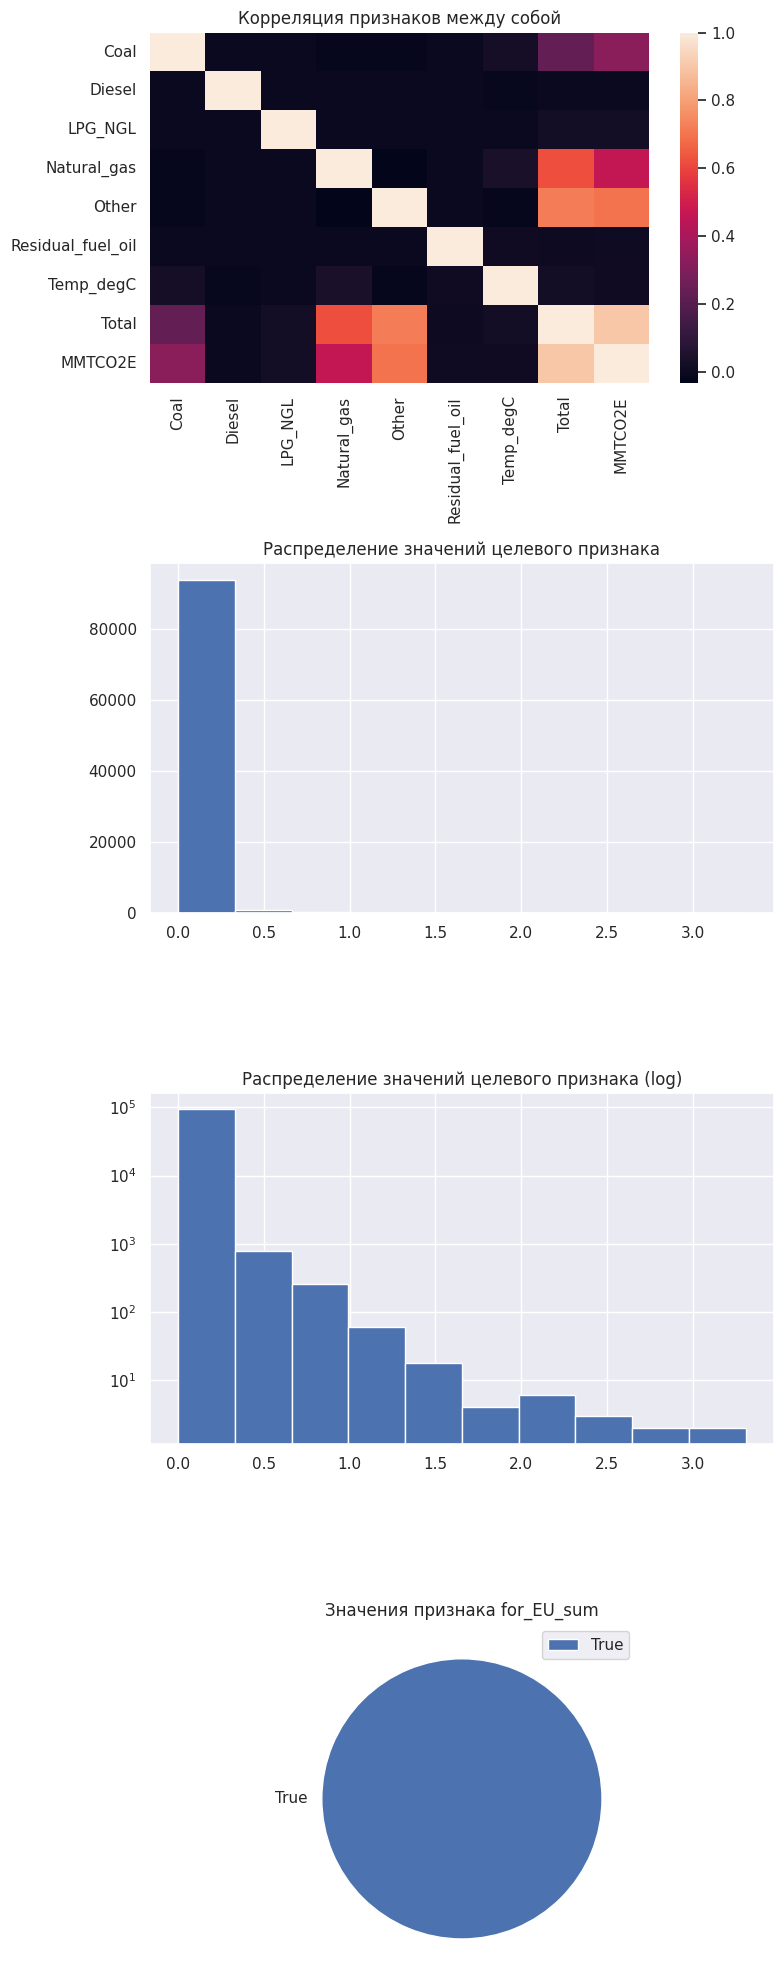

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(8, 20))

sns.heatmap(ax=ax[0], data=df[numeric_features + [target]].corr())
ax[0].set_title('Корреляция числовых признаков и целевого между собой')

ax[1].hist(df[target].values)
ax[1].set_title('Распределение значений целевого признака')

ax[2].hist(df[target].values, log=True)
ax[2].set_title('Распределение значений целевого признака (log)')

labels, counts = np.unique(df.for_EU_sum, return_counts=True)
ax[3].pie(counts, labels=labels)
ax[3].set_title('Значения признака for_EU_sum')
ax[3].legend()

fig.tight_layout();

какие выводы можно сделать по визуализации?

- **Корреляция.** Наибольшую по модулю корреляцию с целевым признаком имеют признаки Total $(0.901816)$ и Other $(0.695507)$. После них идут признаки Natural_gas $(0.461269)$ и Coal $(0.324881)$. Остальные признаки имеют околонулевую корреляцию с целевым и их можно было бы удалить без потери качества модели, но делать я этого не буду

- **Распределение целевого признака.** Значения целевого признака распределены крайне неравномерно, для большего представления о сравнительном количестве малочисленных значений представлена гистограмма в логарифмическом масштабе

- **Значения признака for_EU_sum.** Во всех строках имеет значение True - в нём просто нет смысла, его можно удалить.

In [10]:
# df[numeric_features + [target]].corr()

### Предобработка данных

In [9]:
df = df.drop(['for_EU_sum'], axis=1)
categorical_features.remove('for_EU_sum')

In [10]:
df.isnull().sum()

Coal                 0
Diesel               0
END_USE              0
FUEL_TYPE            0
FUEL_TYPE_BLEND      0
FUEL_TYPE_OTHER      0
LPG_NGL              0
Natural_gas          0
Other                0
Process_byp          0
Pulp_Paper           0
Residual_fuel_oil    0
Temp_degC            0
Total                0
UNIT_TYPE            0
Biogenic             0
MMTCO2E              0
dtype: int64

пустых значений в датасете нет. однако у некоторых категориальных признаков, да и у числовых тоже, стоят нули в значениях - подозреваю, что отсутствующие значение были заполнены до меня, и если так, то заполнены не лучшим образом. но это только догадки, поэтому заменять '0' в категориальных признаках на моды я не буду

применим one-hot кодирование ко всем категориальным признакам:

In [11]:
prefixes = ['eu', 'ft', 'ftb', 'fto', 'pb', 'pp', 'ut', 'b']

In [12]:
df_for_model = pd.get_dummies(data=df, columns=categorical_features, prefix=prefixes)

In [13]:
df_for_model

,Coal,Diesel,LPG_NGL,Natural_gas,Other,Residual_fuel_oil,Temp_degC,Total,MMTCO2E,eu_CHP and/or Cogeneration Process,...,ut_Process Vent,ut_Q (Other Subpart Q combustion sources not otherwise listed.),ut_RCO (Regenerative catalytic oxidizer),ut_RICE (Reciprocating internal combustion engine),ut_RTO (Regenerative thermal oxidizer),ut_S (Stoker Boiler),"ut_SCCT (CT (Turbine, simple cycle combustion))","ut_TODF (Thermal oxidizer, direct fired, no heat recovery)",b_False,b_True
0,0.000000,0.0,0.0,328.280712,0.0,0.0,1100.0,328.280712,0.016527,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.0,0.0,666.678118,0.0,0.0,1100.0,666.678118,0.033563,0,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.0,0.0,172.814781,0.0,0.0,1100.0,172.814781,0.008700,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.0,0.0,2925.987834,0.0,0.0,1100.0,2925.987834,0.147303,0,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.0,318.073057,0.0,0.0,1100.0,318.073057,0.016013,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94929,0.000000,0.0,0.0,0.000000,0.0,0.0,800.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
94930,0.000000,0.0,0.0,0.000000,0.0,0.0,800.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
94931,0.000000,0.0,0.0,0.000000,0.0,0.0,800.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
94932,0.000000,0.0,0.0,0.000000,0.0,0.0,800.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0


разобьём данные на тестовые и тренировочные, соотношение оставим стандартное - 0.75 : 0.25

In [14]:
data_train, data_test, target_train, target_test = train_test_split(df_for_model.drop(target, axis=1), df_for_model[target])

попробуем обучать модель на нормализованных данных

In [17]:
# scaler = StandardScaler()

# data_train = scaler.fit_transform(data_train)
# data_test = scaler.transform(data_test)

попробовал - не понравилось

## Создание моделей

### Линейная регрессия

In [28]:
lr = LinearRegression()

lr.fit(data_train, target_train);

In [29]:
true = target_test.values
pred = lr.predict(data_test)

In [20]:
print(f'R2  :>> {lr.score(data_test, target_test)}')
print(f'MAE :>> {mean_absolute_error(true, pred)}')
print(f'MSE :>> {mean_squared_error(true, pred)}')

R2  :>> -26334348.194394737
MAE :>> 5.74203440281448
MSE :>> 165771.41901370388


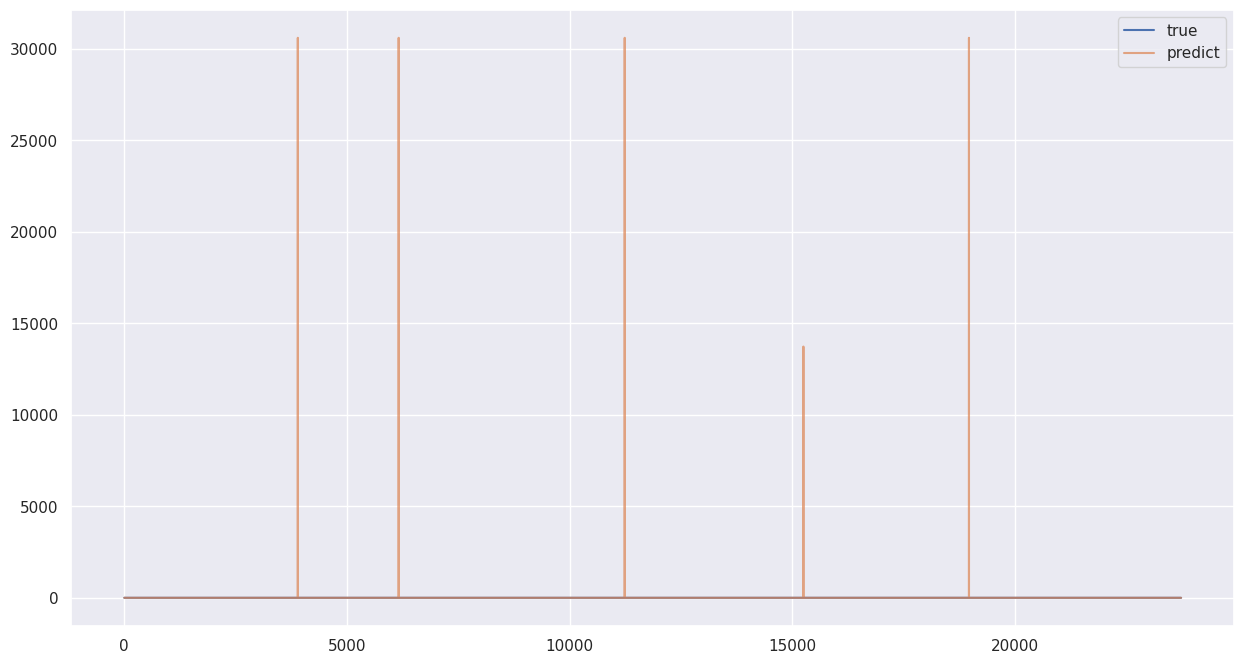

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.plot(true, label='true')
ax.plot(pred, alpha=.7, label='predict')
plt.legend()

In [22]:
print(f'pred.max :>> {pred.max()}')
print(f'true.max :>> {true.max()}')

pred.max :>> 30601.976074488368
true.max :>> 2.598970657250626


ошеломительно. линейная модель не описывает стуктуру в выбранных данных. что ж, бывает и так

### Дерево решений

In [23]:
dtr = DecisionTreeRegressor()

dtr.fit(data_train, target_train)

pred = dtr.predict(data_test)

print(f'R2  :>> {dtr.score(data_test, target_test)}')
print(f'MAE :>> {mean_absolute_error(true, pred)}')
print(f'MSE :>> {mean_squared_error(true, pred)}')

R2  :>> 0.9994661575218173
MAE :>> 0.00015693667195930947
MSE :>> 3.360471317702945e-06


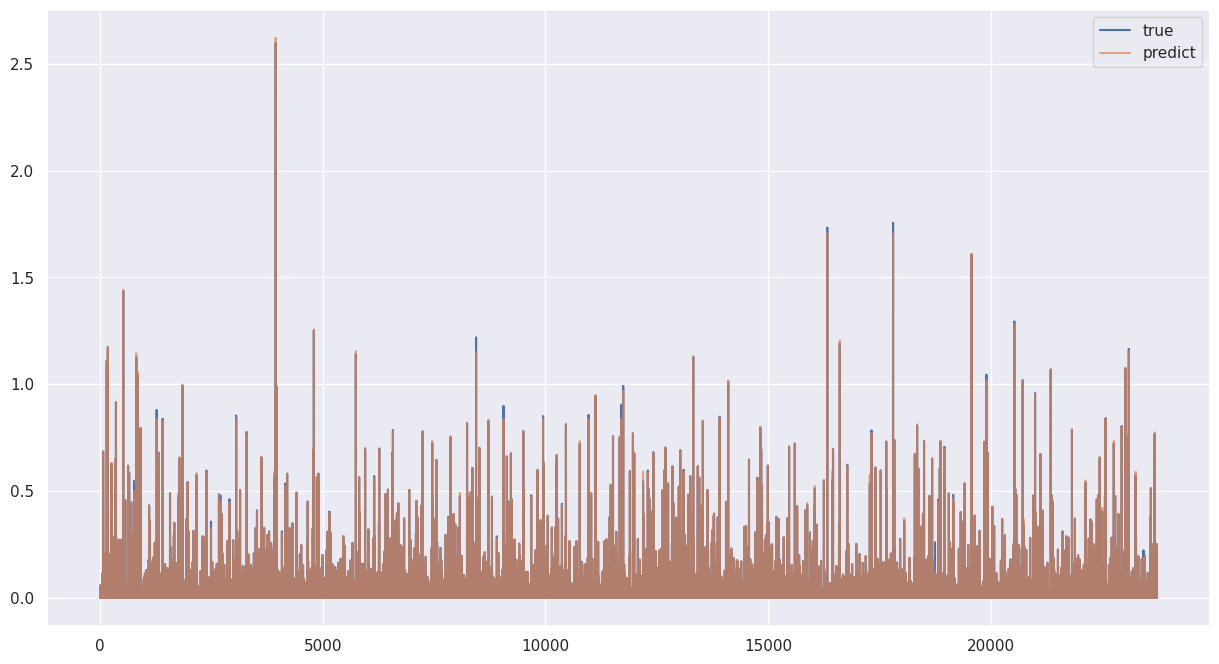

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8));
ax.plot(true, label='true')
ax.plot(pred, alpha=.7, label='predict')
plt.legend()

Теперь видно, что в целом всё "ОК", хоть в некоторых местах модель и занижает выделение парниковых газов (синие полоски над серыми)

### Модели с L1 и L2 регуляризацией: Lasso и Ridge

In [25]:
l1, l2 = Lasso(), Ridge()

l1.fit(data_train, target_train)
l1_pred = l1.predict(data_test)
l2.fit(data_train, target_train)
l2_pred = l2.predict(data_test)

print(f'Lasso R2  :>> {l1.score(data_test, target_test)}')
print(f'Lasso MAE :>> {mean_absolute_error(true, l1_pred)}')
print(f'Lasso MSE :>> {mean_squared_error(true, l1_pred)}')
print('---')
print(f'Ridge R2  :>> {l2.score(data_test, target_test)}')
print(f'Ridge MAE :>> {mean_absolute_error(true, l2_pred)}')
print(f'Ridge MSE :>> {mean_squared_error(true, l2_pred)}')

Lasso R2  :>> 0.8864371473351137
Lasso MAE :>> 0.004945364416534963
Lasso MSE :>> 0.0007148638872575364
---
Ridge R2  :>> 0.9065955748810368
Ridge MAE :>> 0.006069413747620787
Ridge MSE :>> 0.0005879691189568294


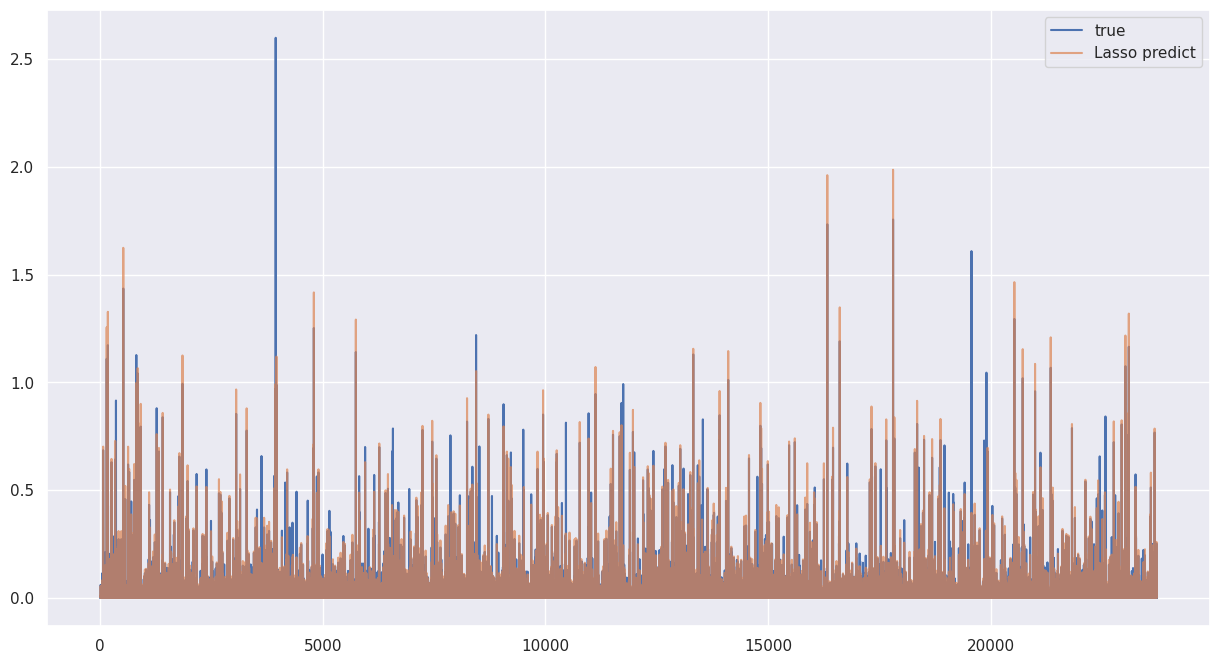

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8));
ax.plot(true, label='true')
ax.plot(l1_pred, alpha=.7, label='Lasso predict')
plt.legend()

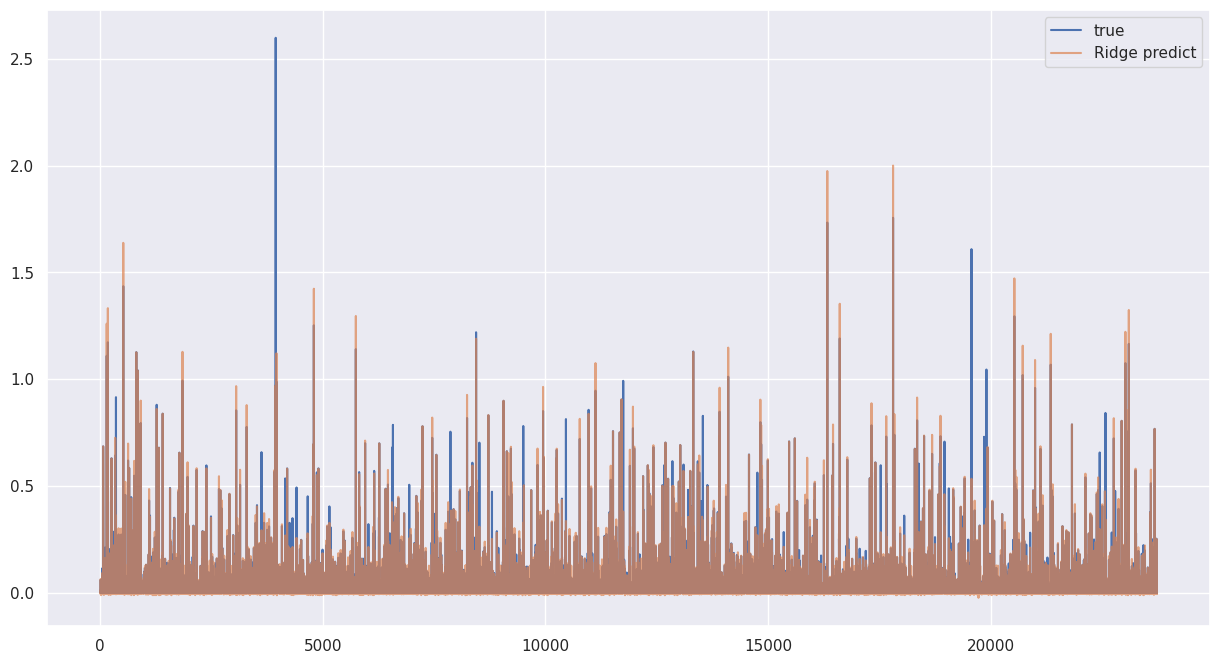

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8));
ax.plot(true, label='true')
ax.plot(l2_pred, alpha=.7, label='Ridge predict')
plt.legend()

не самый плохой результат, но и не хороший. но, возможно, подбор гиперпараметров улучшит ситуацию?

## Гиперпараметры

In [28]:
models = [
    {
        'name': 'Дерево принятия решений',
        'instance': DecisionTreeRegressor()
    },
    {
        'name': 'Лассо-регрессия (L1)',
        'instance': Lasso()
    },
    {
        'name': 'Гребневая регрессия (L2)',
        'instance': Ridge()
    }
]

params= [
    {
        'max_features': [5, 10, 15, 20, 25, 30, 35, 40],
        'max_depth': [None, 1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]
    },
    {
        'alpha': np.arange(1, 2 + .2, .2)
    },
    {
        'alpha': np.arange(1, 2 + .5, .5),
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    }
]

In [29]:
best_score = None
for model, params_grid in zip(models, params):
    regressor = GridSearchCV(model['instance'], params_grid)
    regressor.fit(data_train, target_train)
    parameters = regressor.best_params_
    R2 = regressor.score(data_test, target_test)
    if best_score is None or R2 > best_score:
        best_score = R2
        best_model = model
        best_params = parameters
    print(f'Модель         :>> {model["name"]}')
    print(f'R2             :>> {R2}')
    print(f'При параметрах :>> {parameters}')
    print('---')

print(f'Лучшая модель :>> {best_model["name"]}')
print(f'R2            :>> {best_score}')
print(f'Параметры     :>> {best_params}')

Модель         :>> Дерево принятия решений
R2             :>> 0.9907485397447586
При параметрах :>> {'max_depth': None, 'max_features': 10}
---
Модель         :>> Лассо-регрессия (L1)
R2             :>> 0.8864371473351137
При параметрах :>> {'alpha': 1.0}
---


/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sega/projects/as-backend-course/Project/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

Модель         :>> Гребневая регрессия (L2)
R2             :>> 0.9066172168381894
При параметрах :>> {'alpha': 2.0, 'solver': 'svd'}
---
Лучшая модель :>> Дерево принятия решений
R2            :>> 0.9907485397447586
Параметры     :>> {'max_depth': None, 'max_features': 10}


в общем-то лучше не стало. well i tried

In [33]:
with open('../../models/best-regressor.model', 'wb') as file:
    pickle.dump(
        pickle.dumps(dtr), file
    )

In [38]:
with open('../../models/best-regressor.model', 'rb') as file:
    bs = pickle.load(file)

model = pickle.loads(bs)

In [39]:
model.score(data_test, target_test)

0.9994661575218173

## Нейронные сети

In [15]:
keras.backend.clear_session()

nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(data_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

nn.compile(optimizer='adam', loss='mae')
history = nn.fit(data_train, target_train, epochs=500)

2023-02-27 14:22:51.327618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
2225/2225 [==============================] - 6s 2ms/step - loss: 0.1566
Epoch 2/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0120
Epoch 3/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0054
Epoch 4/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0056
Epoch 5/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0051
Epoch 6/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0041
Epoch 7/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0038
Epoch 8/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 9/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 10/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 11/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 12/500
2225/2225 [==============================] - 5s 2ms/step - lo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2225/2225 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 154/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 155/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 156/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0014
Epoch 157/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0017
Epoch 158/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 159/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 160/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 161/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 162/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0020
Epoch 163/500
2225/2225 [==============================] - 5s 2ms/step - loss: 0.0015
Epoch 164/500
2225/2225 [==============================] - 5s 2ms/st

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2225/2225 [==============================] - 5s 2ms/step - loss: 8.6302e-04
Epoch 304/500
2225/2225 [==============================] - 5s 2ms/step - loss: 8.7607e-04
Epoch 305/500
2225/2225 [==============================] - 5s 2ms/step - loss: 7.9437e-04
Epoch 306/500
2225/2225 [==============================] - 5s 2ms/step - loss: 9.8922e-04
Epoch 307/500
2225/2225 [==============================] - 5s 2ms/step - loss: 9.2561e-04
Epoch 308/500
2225/2225 [==============================] - 5s 2ms/step - loss: 7.9608e-04
Epoch 309/500
2225/2225 [==============================] - 5s 2ms/step - loss: 8.7581e-04
Epoch 310/500
2225/2225 [==============================] - 5s 2ms/step - loss: 8.9192e-04
Epoch 311/500
2225/2225 [==============================] - 5s 2ms/step - loss: 7.7667e-04
Epoch 312/500
2225/2225 [==============================] - 5s 2ms/step - loss: 8.7531e-04
Epoch 313/500
2225/2225 [==============================] - 5s 2ms/step - loss: 7.8619e-04
Epoch 314/500
2225/2225 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
nn_pred = nn.predict(data_test, verbose=False)

print(f'NN MAE :>> {mean_absolute_error(target_test.values, nn_pred)}')
print(f'NN MSE :>> {mean_squared_error(target_test.values, nn_pred)}')

NN MAE :>> 0.0008490872557367281
NN MSE :>> 0.00026335487009459694


Text(0.5, 1.0, 'Зависимость функции потерь от эпохи (ближе)')

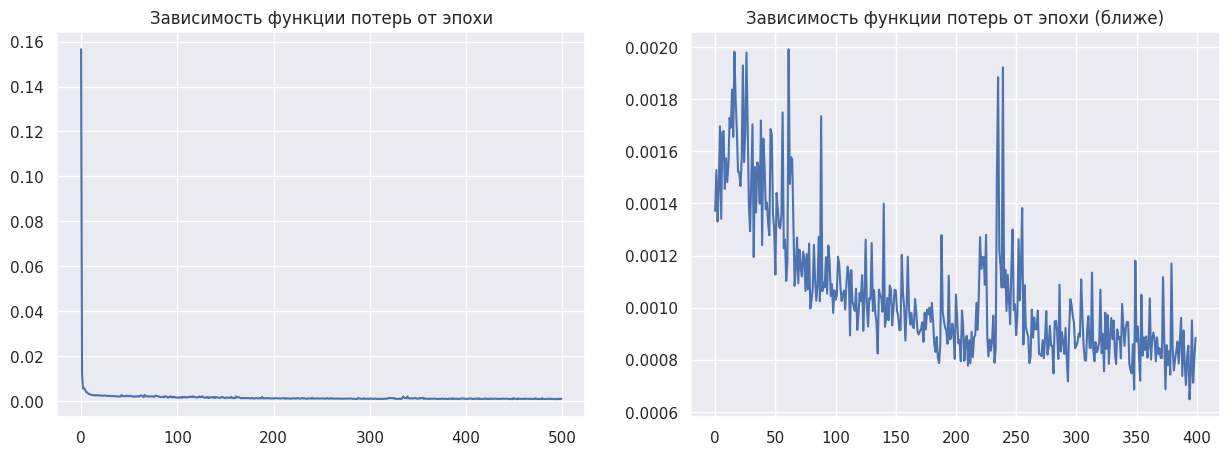

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(np.array(list(history.history.values())).reshape(-1,))
ax[0].set_title('Зависимость функции потерь от эпохи')

ax[1].plot(np.array(list(history.history.values())).reshape(-1,)[100:])
ax[1].set_title('Зависимость функции потерь от эпохи (ближе)')

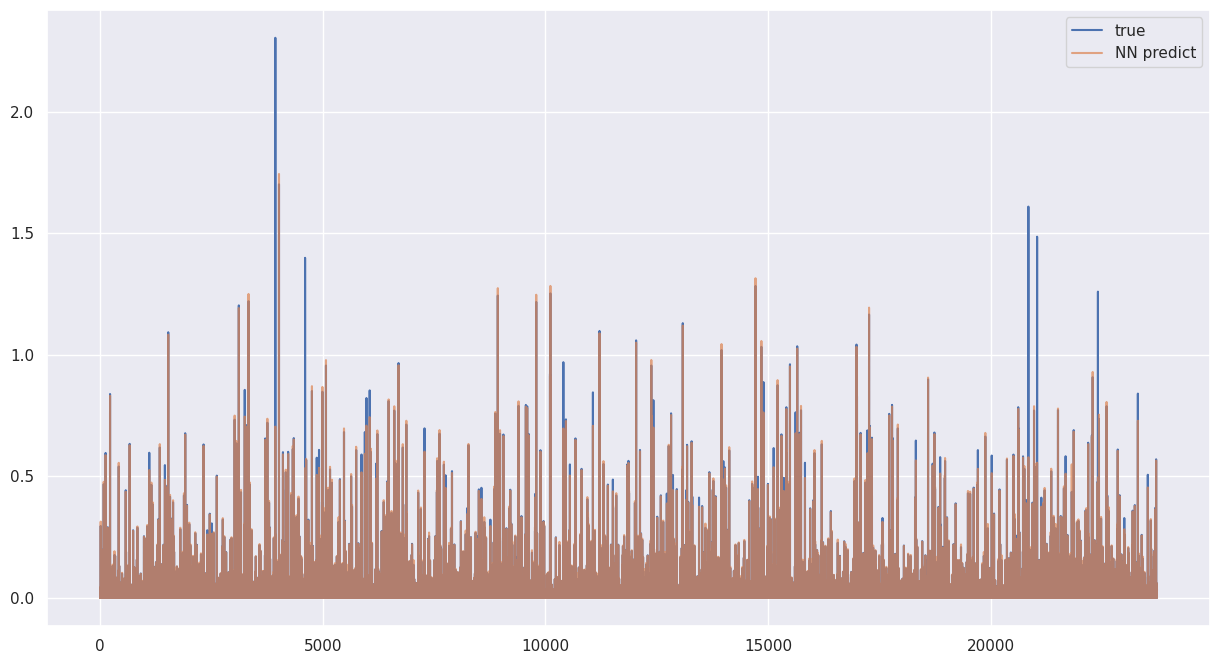

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8));
ax.plot(target_test.values, label='true')
ax.plot(nn_pred.flatten(), alpha=.7, label='NN predict')
plt.legend()

## Дополнительно: XGBoost

In [46]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(data_train.to_numpy(), target_train.to_numpy())
xgb_pred = xgb_regressor.predict(data_test.to_numpy())
print(f'R2 :>> {xgb_regressor.score(data_test.to_numpy(), target_test.to_numpy())}')
print(f'MAE :>> {mean_absolute_error(true, xgb_pred)}')
print(f'MSE :>> {mean_squared_error(true, xgb_pred)}')

R2 :>> 0.9991196239210474
MAE :>> 0.00040283471933436716
MSE :>> 5.541856789259857e-06


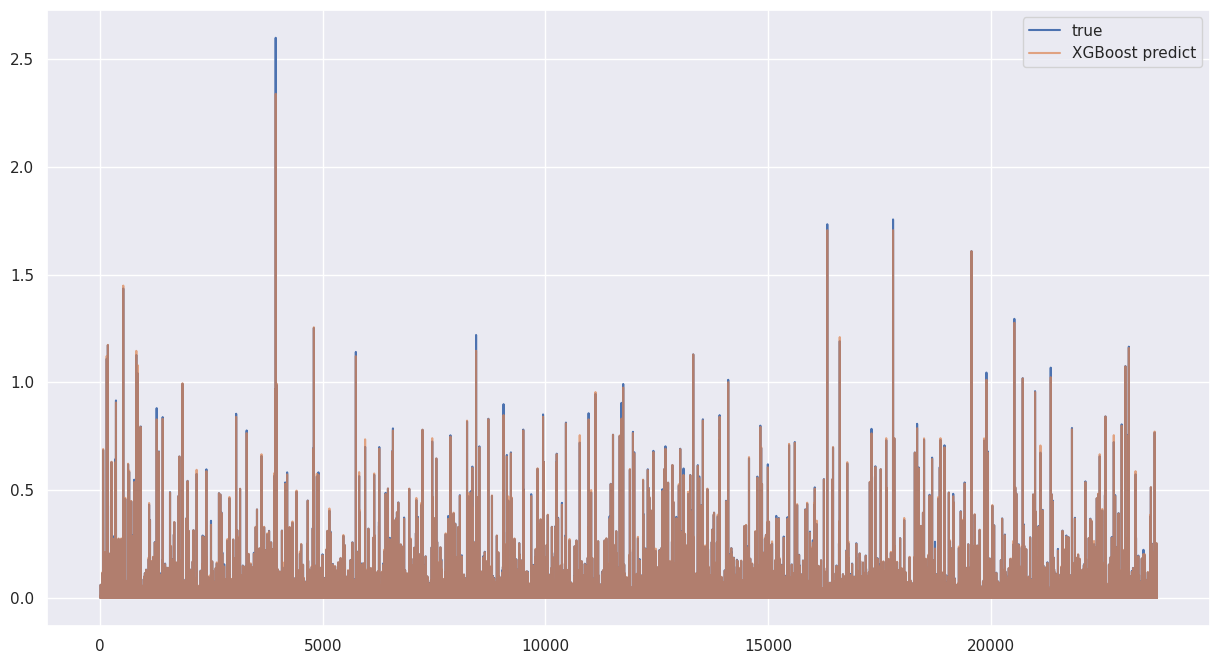

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8));
ax.plot(true, label='true')
ax.plot(xgb_pred, alpha=.7, label='XGBoost predict')
plt.legend()

достойный результат! почти дотянул до решающих деревьев...)

## Дополнительно: CatBoost

In [18]:
import catboost as cb

cbr = cb.CatBoostRegressor()
cbr.fit(data_train.to_numpy(), target_train.to_numpy(), verbose=False)
cbr_pred = cbr.predict(data_test.to_numpy())
print(f'R2 :>> {cbr.score(data_test.to_numpy(), target_test.to_numpy())}')
print(f'MAE :>> {mean_absolute_error(true, cbr_pred)}')
print(f'MSE :>> {mean_squared_error(true, cbr_pred)}')

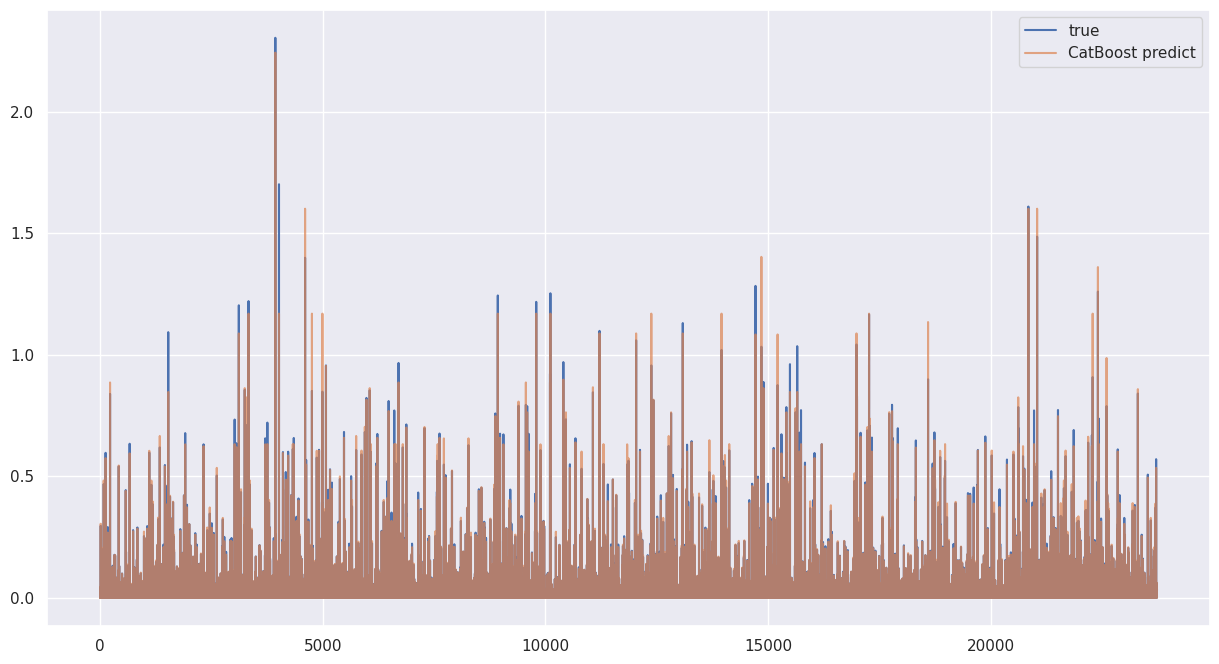

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8));
ax.plot(true, label='true')
ax.plot(cbr_pred, alpha=.7, label='CatBoost predict')
plt.legend()

тоже неплохие показатели. в целом, все три модели (деревья, xgb, catboost) можно использовать, поскольку они показывают достойные результаты на тестовой (валидационной) выборке